# Problem Statement:
# Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import poisson, binom, expon, geom
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import weightstats as stests
import random

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 4.00MB/s]


In [ ]:
# Reading csv file
df=pd.read_csv('/content/bike_sharing.csv?1642089089')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
# Gives total number of rows and columns
df.shape

(10886, 12)

There are 10,886 rows and 12 columns.

In [ ]:
# Gives name of columns
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
# Brief information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df['datetime']=df['datetime'].astype('datetime64[ns]')
df.dtypes

,0
datetime,datetime64[ns]
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


Here datetime64 is optimized for numerical operations on dates and times, often leading to better performance compared to handling dates as strings or generic objects.

In [ ]:
# Nature of data
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Unique value of each column.
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [ ]:
# Top 10 rows
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [ ]:
# Bottom 10 rows
df.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10876,2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
# Count NaN values per column
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


This shows there are no Null or NaN values in the dataset.

In [ ]:
# Necessary details are calculated using 'describe' function.
# Thus 'describe' depicts the calculation on numerical data.
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


# **Checking value counts for various columns:**

In [ ]:
df['datetime'].value_counts()

,count
datetime,
2012-12-19 23:00:00,1
2011-01-01 00:00:00,1
2011-01-01 01:00:00,1
2011-01-01 02:00:00,1
2011-01-01 03:00:00,1
...,...
2011-01-01 10:00:00,1
2011-01-01 09:00:00,1
2011-01-01 08:00:00,1


In [ ]:
df['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


Season:
1: spring,
2: summer,
3: fall,
4: winter

In [ ]:
df['holiday'].value_counts()

,count
holiday,
0,10575
1,311


0 implies no holiday, and 1 implies holiday.

In [ ]:
df['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


 1 implies if day is neither weekend nor holiday, otherwise it is 0.

In [ ]:
df['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


weather:
1: Clear, Few clouds, partly cloudy, partly cloudy;
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ;
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ;
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
#To check for duplicates
df.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset.


# Analyse Distribution of Numerical Columns:

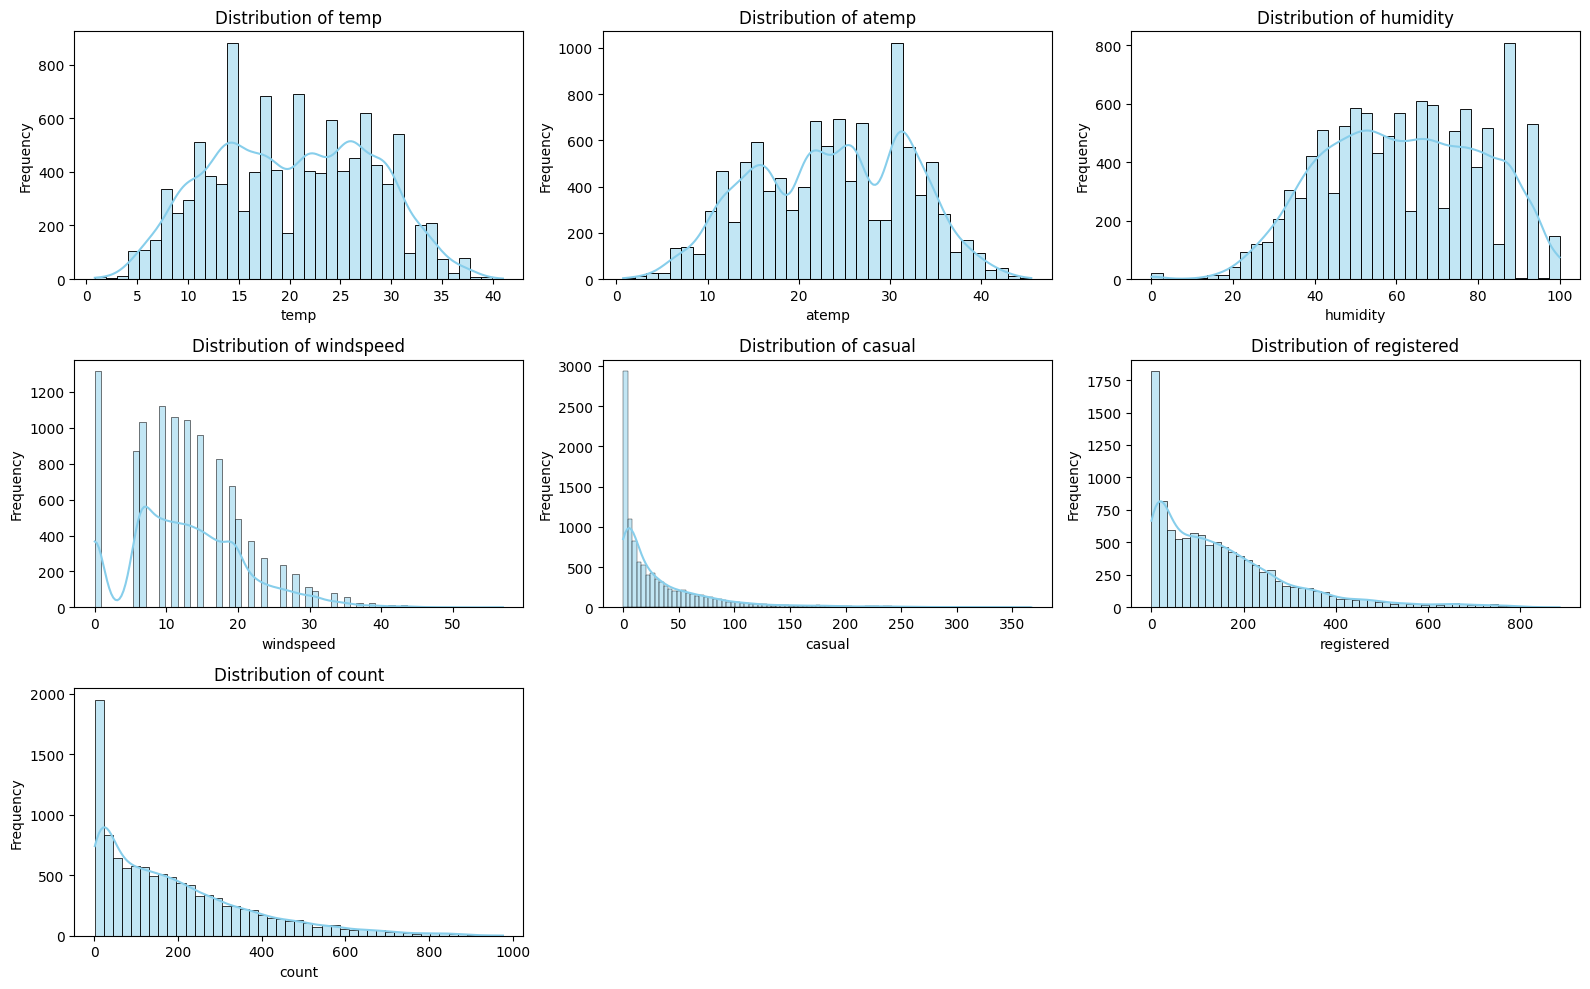

In [ ]:
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(16, 10))  # Adjust width and height as needed

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns (adjust based on number of plots)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Key Observations:-**

** COLUMN-TEMP**

 •Bell-shaped or skewed distribution, centered around mid-range values.

 •Indicates typical riding conditions; extreme heat/cold may reduce rentals.

 **COLUMN-ATEMP**

 •Should mirror temp, but may show smoother curves due to perceived comfort

•Compare with temp to see if perceived temperature impacts demand differently

 **COLUMN-HUMIDITY**

 •High peaks or long tails toward extremes

 •Higher humidity might deter biking; clustering near high values could indicate discomfort zones

** COLUMN-windspeed**

 •Often right-skewed due to calm conditions being more frequent

 •Low wind speeds dominate; check if high winds coincide with low rental counts.

 **COLUMN-casual**

 •May be right-skewed with most counts near zero.

 •Casual users might rent bikes only on weekends or holidays.

 **COLUMN-registered**

 •Likely to have a more symmetric or concentrated peak at higher values.

 •Suggests consistent behavior like commuting; distribution helps separate patterns from casual users.

 **COLUMN-count**

 •Should follow a blend of casual + registered distributions.

 •Helps assess overall demand and how much variability comes from casual or registered users.

# **Analyse Distribution of Categorical Columns:**

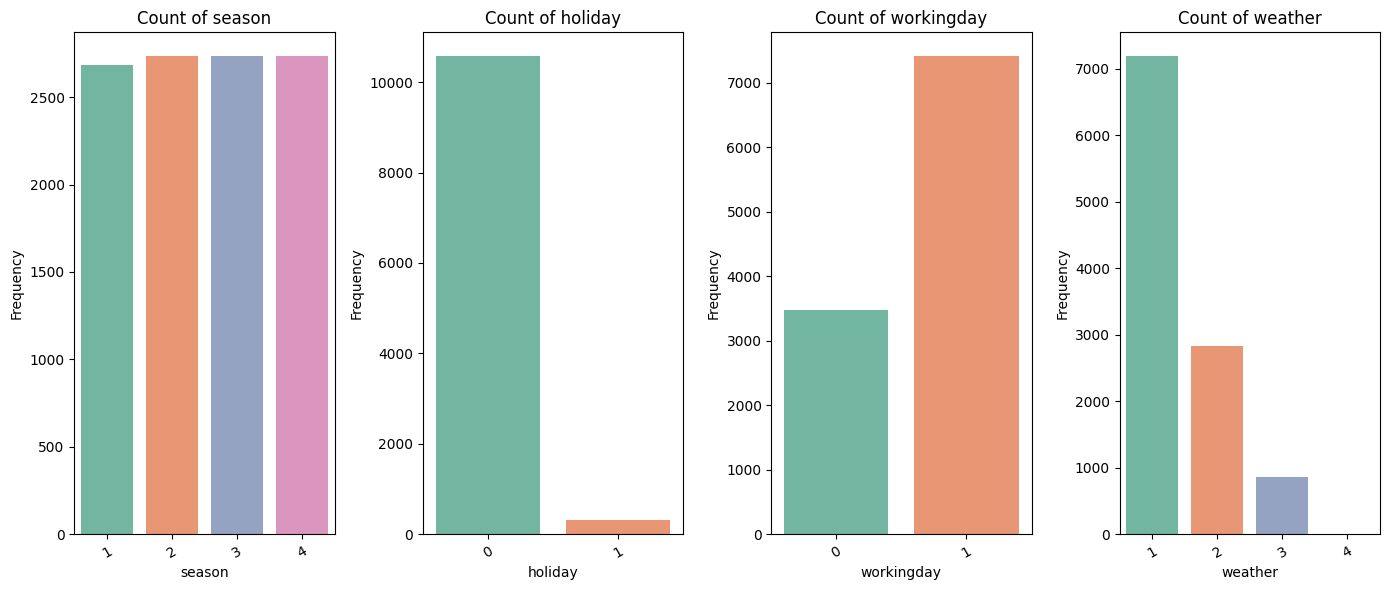

In [ ]:
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

plt.figure(figsize=(14, 6))  # Adjust size as needed

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 4, i)  # 1 row, 4 columns since we have 4 categories
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

**Key Observations:**
🌦️ season
- Inference: You’ll likely notice an uneven distribution across the four seasons.

- For example, if fall or summer has noticeably more records, it may reflect higher demand or better weather conditions for biking.

- Useful for: Seasonal trend analysis and time-based feature engineering.

🎉 holiday

- Inference: Expect far fewer entries marked as holidays (typically 0 dominates).

- This indicates that most of your dataset is made up of non-holiday records.

- Useful for: Comparing user behavior and rental volume between holidays vs. regular days.

💼 workingday
- Inference: A strong skew toward working days (value 1), which suggests the dataset mostly covers weekdays and non-holidays.

- This will influence usage patterns — for example, higher registered user counts may coincide with working days due to commuting.

🌤️ weather

- Inference: Likely to show a dominance of weather type 1 (clear/few clouds), with fewer records in extreme conditions like heavy rain or snow (type 4).

- This implies most rides occur in good weather — you could test how demand drops during unfavorable conditions.

- Useful for: Modeling weather sensitivity in demand forecasting.



# **Detect and treat outliers:**

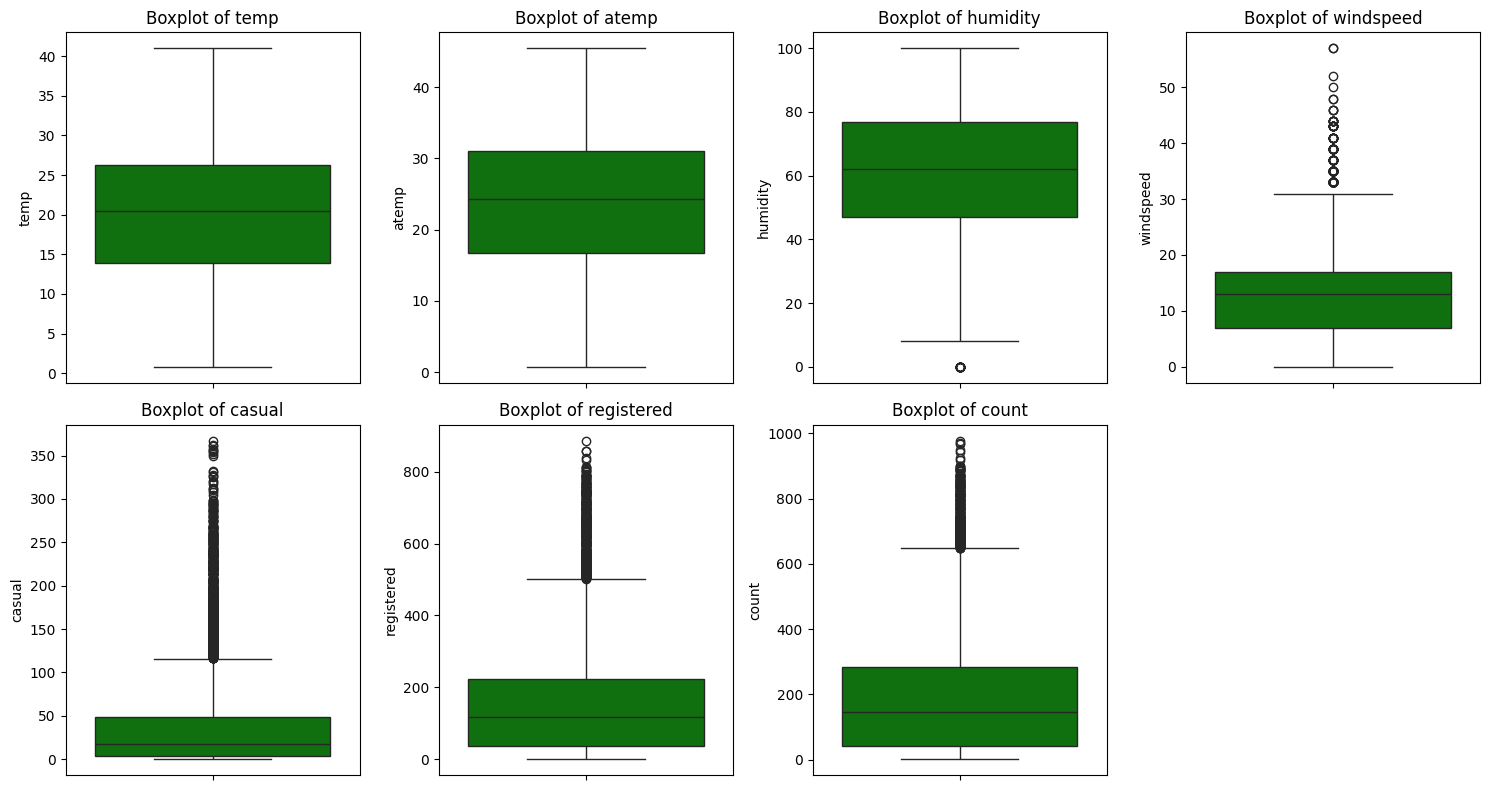

In [ ]:
# Visualize outliers using boxplots
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col], color='green')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [ ]:
for col in numerical_cols:
    # Calculate Q1 and Q3
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} has {len(outliers)} outliers")

temp has 0 outliers
atemp has 0 outliers
humidity has 22 outliers
windspeed has 227 outliers
casual has 749 outliers
registered has 423 outliers
count has 300 outliers


Certainly there are outliers in our data. When we remove them, this leads to loss of information. So instead of removing, it's going to be clipped (i.e. - ranges between 5 percentile and 95 percentile).

The outlier treatment is demonstrated in the below piece of code .

In [ ]:
for col in numerical_cols:
    lower = np.percentile(df[col], 5)
    upper = np.percentile(df[col], 95)
    df[col] = np.clip(df[col], lower, upper)


In [ ]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_post = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers_post)} outliers remaining after clipping")


temp: 0 outliers remaining after clipping
atemp: 0 outliers remaining after clipping
humidity: 0 outliers remaining after clipping
windspeed: 0 outliers remaining after clipping
casual: 749 outliers remaining after clipping
registered: 0 outliers remaining after clipping
count: 0 outliers remaining after clipping


# **Establishing a Relationship between the Dependent and Independent Variables:**

**Plotting Correlation heatmap:**

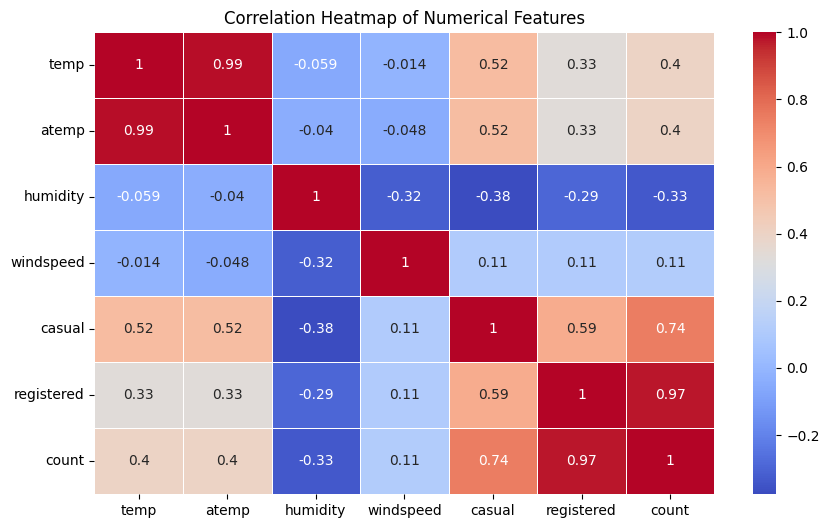

In [ ]:
corr_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Key Observations:**
- temp and atemp (Correlation ≈ 0.99): These are near-perfectly correlated. They're likely capturing the same information, so keeping just one would reduce multicollinearity.
- registered and count (Correlation ≈ 0.97): Strong overlap, since count likely includes registered. Depending on our modeling goal, we may want to exclude registered if we're predicting total count.
- casual and count (Correlation ≈ 0.74): A high positive correlation, as casual users contribute significantly to total count.
- humidity and casual (Correlation ≈ -0.38): Negative relationship suggests that more humid weather reduces casual rider activity.
- Moderate relationships also exist between temperature-related variables (temp, atemp) and user categories (casual, registered), indicating a weather impact on ridership.


Now Highly correlated variables should be removed from datasets in machine learning because they can lead to issues like model instability, reduced prediction accuracy, and difficulty in interpreting the model's results. Highly correlated variables, also known as multicollinearity, can cause the model to overemphasize the importance of one variable while ignoring others that might be more relevant.
This shown as below:

In [ ]:
corr_matrix = df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
df_reduced = df.drop(columns=to_drop)


In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Hence highly correlated columns 'atemp' and 'registered' are removed.

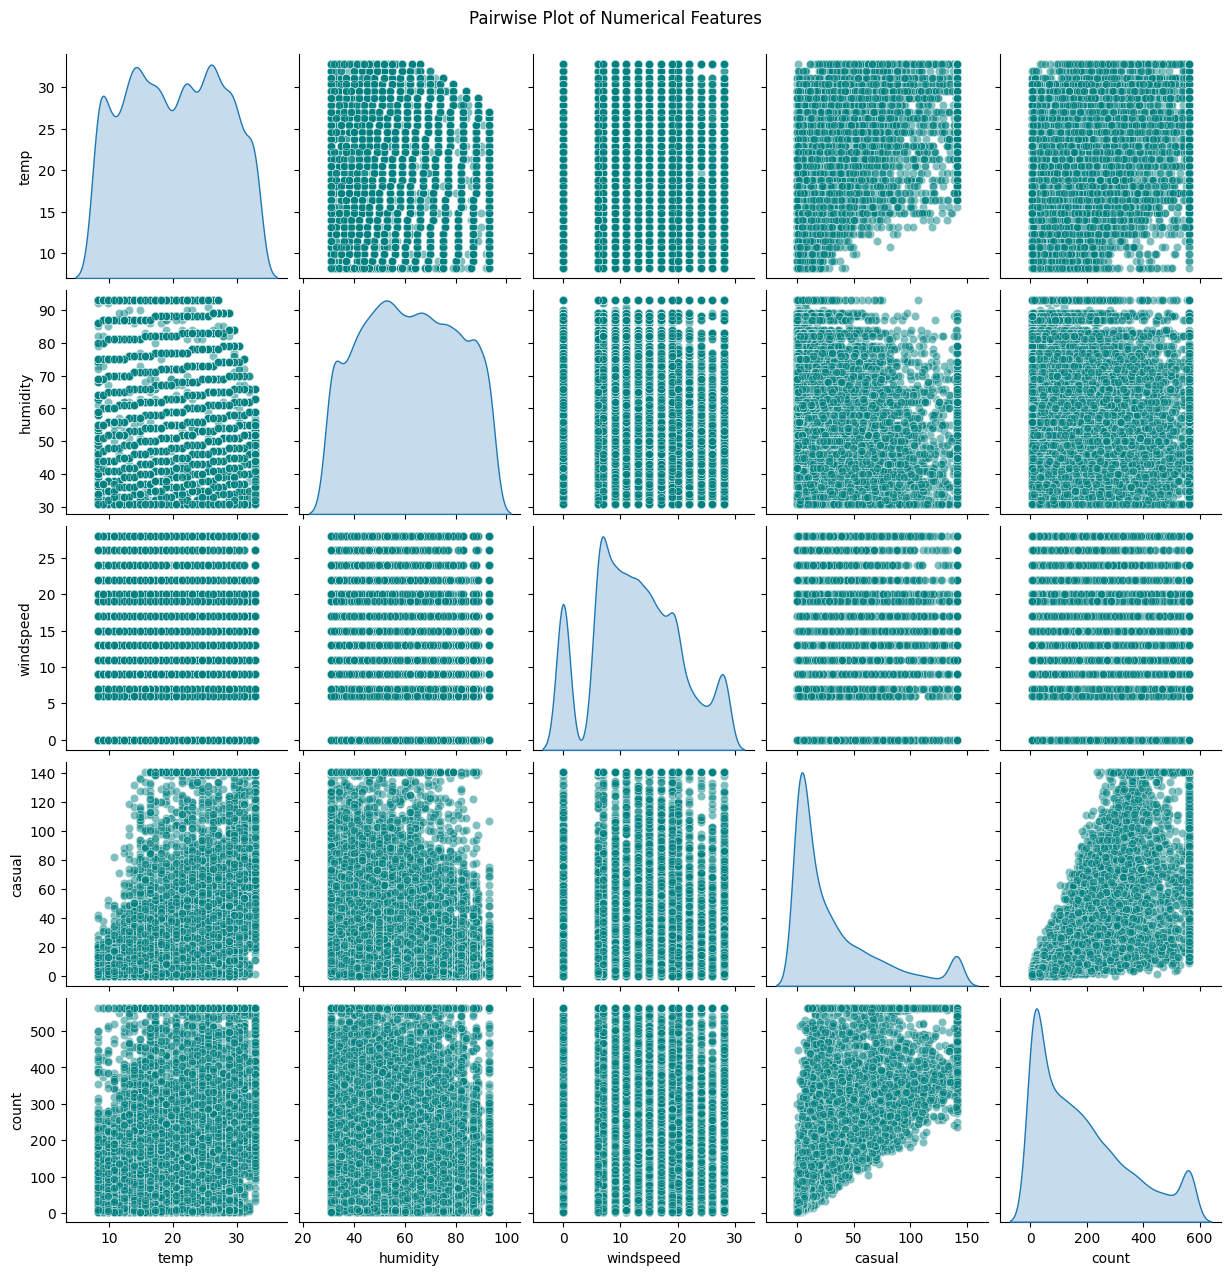

In [ ]:
# Select numerical columns
numerical_cols = ['temp', 'humidity', 'windspeed', 'casual', 'count']
# Build the pairplot
sns.pairplot(df[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.5, 'color': 'teal'})
plt.suptitle("Pairwise Plot of Numerical Features", y=1.02)
plt.show()

**Key Observations:**


Temperature is a significant factor: Both casual and total user counts show a positive correlation with temperature, suggesting that people are more likely to use the service when temperatures are mild to warm.

Humidity has a subtle negative impact: Higher humidity might slightly deter both casual and total users, though the relationship is not as strong as with temperature.

Windspeed has less clear impact: The relationship between windspeed and user counts (both casual and total) is not as pronounced or linear as temperature or humidity. Extreme windspeeds might have a negative effect.

Casual users contribute heavily to total users: There is a very strong positive correlation between casual users and the total count, as expected.

Skewed Distributions: Most features, especially windspeed, casual, and count, are heavily skewed towards lower values, indicating that low activity/values are common, with occasional bursts of higher activity/values.

In [ ]:
#correlation matrix
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

               temp  humidity  windspeed    casual     count
temp       1.000000 -0.058527  -0.013790  0.523195  0.402393
humidity  -0.058527  1.000000  -0.320708 -0.376588 -0.334454
windspeed -0.013790 -0.320708   1.000000  0.109439  0.114694
casual     0.523195 -0.376588   0.109439  1.000000  0.744431
count      0.402393 -0.334454   0.114694  0.744431  1.000000


The same is depicted from this matrix.


# ***Question:Check if there is any significant difference between the no. of bike rides on Weekdays:***

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,4,5.0


# Hypothesis Formulation:
 Null Hypothesis (H₀):There is no significant difference in the number of bike rides between weekdays and weekends.
 Alternate Hypothesis (H₁): There is a significant difference in the number of bike rides between weekdays and weekends.

 We'll use a 2-sample independent t-test since we're comparing the means of two independent groups (Weekdays vs Weekends).

 Calculate Test Statistics / p-value
Assuming dataset has a 'workingday' column:
- 1 indicates weekday,
- 0 indicates weekend

In [ ]:
from scipy.stats import ttest_ind

# Separate data into weekdays and weekends
weekday_rides = df[df['workingday'] == 1]['count']
weekend_rides = df[df['workingday'] == 0]['count']

# Perform the t-test
t_stat, pvalue = ttest_ind(weekday_rides, weekend_rides)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {pvalue:.4f}")

T-statistic: -0.0819
P-value: 0.9348


In [ ]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0.\nThis concludes There is a significant difference in the number of bike rides between weekdays and weekends')
else:
  print ('Fail to Reject H0.\nThis concludes there is no significant difference in the number of bike rides between weekdays and weekends.')

Fail to Reject H0.
This concludes there is no significant difference in the number of bike rides between weekdays and weekends.


Key Observations:
- High P-value (0.9348 > 0.05):

   Fail to reject the null hypothesis.

   There’s no strong evidence to claim that the mean number of rides on weekdays differs from weekends.

- Low T-statistic (close to 0):

   The value is very close to zero.The negative sign indicates that the sample mean (or the difference between two sample means) is slightly less than the hypothesized population mean (or the difference between population means).

Practical Insight

- The ride patterns between weekdays and weekends are not distinct enough to conclude a behavioral shift based on day type.

- People might be using bikes consistently for both commuting and leisure across the week.

 **Operational Recommendations:**

- Uniform Resource Allocation

    Since usage is consistent, ensure even distribution of bikes and maintenance resources throughout the week rather than scaling up or down specifically for weekends or weekdays.

- Maintenance Scheduling

    Plan bike servicing during low traffic hours instead of specific days, minimizing disruption and maintaining uptime.

**Marketing & User Engagement**

- Consistent Engagement Campaigns

    No need to over-target specific days—design promotions that run across the week, like “Ride 5 days in a week and win rewards.”

- Behavioral Segmentation

    Instead of day-based targeting, segment users by riding habits, distance, or time of use. For example, commuters vs leisure riders.

- Loyalty Programs

    Introduce programs that reward frequency and consistency, since users may ride across both weekdays and weekends.



# ***Question: Check if the demand of bicycles on rent is the same for different Weather conditions?***

# Hypothesis Formulation
- Null Hypothesis (H₀): The mean demand for bicycles is the same across different weather conditions.
- Alternate Hypothesis (H₁): The mean demand for bicycles is different for at least one weather condition.

One-way ANOVA is ideal when comparing means across more than two groups (i.e., weather categories like Clear, Misty, Rainy).



In [ ]:
from scipy.stats import shapiro, kurtosis, skew

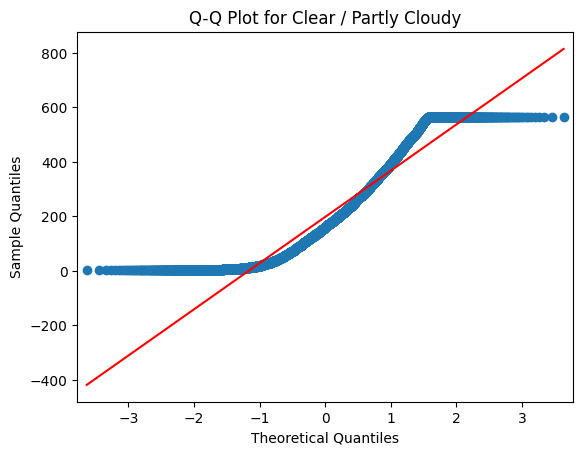

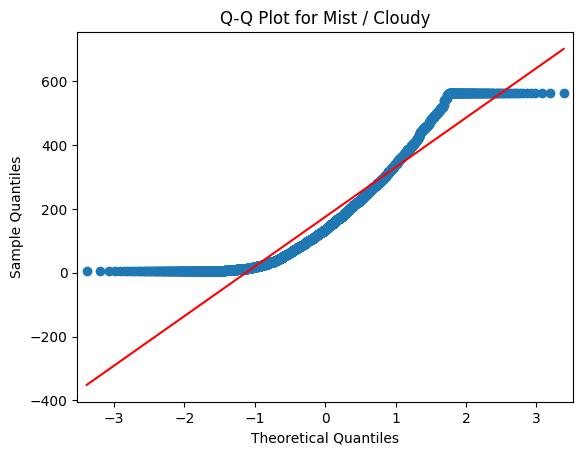

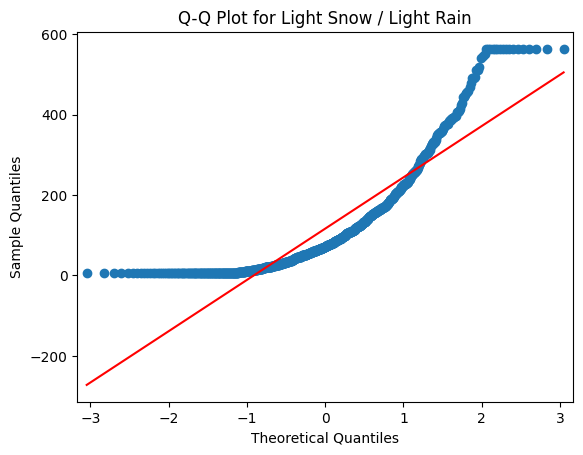

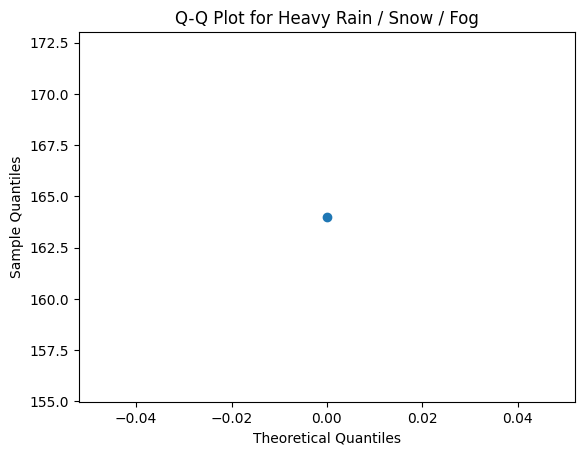

In [ ]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# Weather code to description mapping
weather_labels = {
    1: "Clear / Partly Cloudy",
    2: "Mist / Cloudy",
    3: "Light Snow / Light Rain",
    4: "Heavy Rain / Snow / Fog"
}

# Loop through each unique weather code
for condition in df['weather'].unique():
    subset = df[df['weather'] == condition]['count']
    description = weather_labels.get(condition, f"Weather {condition}")

    qqplot(subset, line='s')
    plt.title(f"Q-Q Plot for {description}")
    plt.show()

**Key Observations:**

- Clear / Partly Cloudy:The Q-Q plot for "Clear / Partly Cloudy" data confirms that it is not normally distributed. It exhibits a distinct S-shape with significant clustering of values near a lower bound of 0 and an upper bound around 650-700. This suggests that the measured variable is inherently limited by these bounds, and a non-normal statistical model would be required for proper analysis.

- Mist / Cloudy: The Q-Q plot clearly demonstrates that the "Mist / Cloudy" data is not normally distributed. It exhibits a distinct S-shape, characterized by a concentration of values at the lower end (around 0) and a significant accumulation of values at the upper end (around 600-650), suggesting a bounded variable or a highly skewed/non-normal distribution

- Light Snow / Light Rain: he Q-Q plot for "Light Snow / Light Rain" data clearly indicates that it is not normally distributed. It exhibits an S-shaped pattern with a strong concentration of data points at a lower bound near 0 and at an upper bound around 650-670.

- Heavy Rain / Snow / Fog: - The Q-Q plot for "Heavy Rain / Snow / Fog" indicates that there is only one data point in the sample for this weather condition, with a value around 164. Therefore, no conclusions can be drawn about the statistical distribution (e.g., normality, skewness, tails) of the variable under "Heavy Rain / Snow / Fog" conditions from this plot alone


Non-Normal Distribution: Since none of the datasets are normally distributed, standard statistical methods that assume normality (e.g., t-tests, ANOVA) would not be appropriate without transformation or using non-parametric alternatives.

# CHECKING SKEWNESS AND KURTOSIS:

In [ ]:
# Define the correct column names for demand and weather
demand_col = 'count'
weather_col = 'weather'

# Map weather codes to descriptive labels
# Using the labels you provided:
weather_labels = {
    1: "Clear / Partly Cloudy",
    2: "Mist / Cloudy",
    3: "Light Snow / Light Rain",
    4: "Heavy Rain / Snow / Fog"
}
df['weather_desc'] = df[weather_col].map(weather_labels)

# Group data by descriptive weather condition and select the demand column
weather_groups = df.groupby('weather_desc')[demand_col]

# Iterate through each weather group to calculate and print skewness and kurtosis
for name, group in weather_groups:
    print(f"\n--- Demand ('{demand_col}') for Weather Condition: {name} ---")

    # Calculate Skewness & Kurtosis
    skewness = group.skew()
    kurtosis = group.kurt()

    print(f"Number of observations: {len(group)}")
    print(f"Skewness: {skewness:.4f}")
    print(f"Kurtosis: {kurtosis:.4f}")


--- Demand ('count') for Weather Condition: Clear / Partly Cloudy ---
Number of observations: 7192
Skewness: 0.7363
Kurtosis: -0.5259

--- Demand ('count') for Weather Condition: Heavy Rain / Snow / Fog ---
Number of observations: 1
Skewness: nan
Kurtosis: nan

--- Demand ('count') for Weather Condition: Light Snow / Light Rain ---
Number of observations: 859
Skewness: 1.7013
Kurtosis: 2.6489

--- Demand ('count') for Weather Condition: Mist / Cloudy ---
Number of observations: 2834
Skewness: 0.9297
Kurtosis: 0.0104


🌤️ Clear / Partly Cloudy (Most Frequent)
- Observations: 7192 — dominant weather type in the dataset.
- Skewness: 0.7363 — moderate positive skew; most rental counts are below the mean, but a long tail exists.
- Kurtosis: -0.5259 — platykurtic distribution, flatter than normal, meaning fewer extreme values.
- Insight: Demand tends to be high but distributed more evenly, with fewer outliers. Ideal weather attracts consistent rental activity.

🌧️ Light Snow / Light Rain
- Observations: 859
- Skewness: 1.7013 — highly right-skewed, indicating most demand is low but a few days see unexpected spikes.
- Kurtosis: 2.6489 — leptokurtic, meaning a more peaked distribution with heavy tails.
- Insight: Rentals drop on light precipitation days, but when rentals do occur, they can spike sharply — possibly due to specific events or resilient user segments.

🌫️ Mist / Cloudy
- Observations: 2834
- Skewness: 0.9297 — slight right skew, similar to partly cloudy.
- Kurtosis: 0.0104 — near-zero, suggesting a distribution close to normal.
- Insight: Misty and cloudy conditions cause moderate variation, but demand still follows a typical pattern. Comfort levels might be acceptable for regular commuters.

🌨️ Heavy Rain / Snow / Fog
- Observations: 1 — too few data points for meaningful statistical inference.
- Skewness & Kurtosis: Undefined (NaN)
- Insight: Either rare weather or poor data representation. Additional data would be needed to draw conclusions about extreme conditions.


# Shapiro-wilk test:

In [ ]:
# Define the correct column names for demand and weather
demand_col = 'count'
weather_col = 'weather'

# Map weather codes to descriptive labels
weather_labels = {
    1: "Clear / Partly Cloudy",
    2: "Mist / Cloudy",
    3: "Light Snow / Light Rain",
    4: "Heavy Rain / Snow / Fog"
}
df['weather_desc'] = df[weather_col].map(weather_labels)

# Group data by descriptive weather condition and select the demand column
weather_groups = df.groupby('weather_desc')[demand_col]

# Iterate through each weather group to perform the Shapiro-Wilk test
print("--- Shapiro-Wilk Test for Normality ---")
for name, group in weather_groups:
    print(f"\n--- Demand ('{demand_col}') for Weather Condition: {name} ---")
    print(f"Number of observations: {len(group)}")

    # Shapiro-Wilk test requires at least 3 samples.
    if len(group) >= 3:
        shapiro_stat, shapiro_p = stats.shapiro(group)
        print(f"Shapiro-Wilk Test Statistic: {shapiro_stat:.4f}")
        print(f"Shapiro-Wilk Test p-value: {shapiro_p:.4f}")

        # Interpret the p-value
        alpha = 0.05
        if shapiro_p <= alpha:
            print(f"Conclusion: p-value ({shapiro_p:.4f}) <= alpha ({alpha}), so we reject the Null Hypothesis of Normality.")
        else:
            print(f"Conclusion: p-value ({shapiro_p:.4f}) > alpha ({alpha}), so we fail to reject the Null Hypothesis of Normality.")
    else:
        print(f"Shapiro-Wilk Test skipped: Not enough data points ({len(group)}) for '{name}' group (requires at least 3).")
        if len(group) == 1:
            print(f"Single data point value: {group.iloc[0]}")

--- Shapiro-Wilk Test for Normality ---

--- Demand ('count') for Weather Condition: Clear / Partly Cloudy ---
Number of observations: 7192
Shapiro-Wilk Test Statistic: 0.9006
Shapiro-Wilk Test p-value: 0.0000
Conclusion: p-value (0.0000) <= alpha (0.05), so we reject the Null Hypothesis of Normality.

--- Demand ('count') for Weather Condition: Heavy Rain / Snow / Fog ---
Number of observations: 1
Shapiro-Wilk Test skipped: Not enough data points (1) for 'Heavy Rain / Snow / Fog' group (requires at least 3).
Single data point value: 164.0

--- Demand ('count') for Weather Condition: Light Snow / Light Rain ---
Number of observations: 859
Shapiro-Wilk Test Statistic: 0.7978
Shapiro-Wilk Test p-value: 0.0000
Conclusion: p-value (0.0000) <= alpha (0.05), so we reject the Null Hypothesis of Normality.

--- Demand ('count') for Weather Condition: Mist / Cloudy ---
Number of observations: 2834
Shapiro-Wilk Test Statistic: 0.8921
Shapiro-Wilk Test p-value: 0.0000
Conclusion: p-value (0.0000)

🌤️ Clear / Partly Cloudy
- Observations: 7192
- Normality Test: Rejected
- Insight: Even with clear weather and high demand, the distribution isn't normal — probably skewed due to occasional demand spikes (e.g. weekends or events).

🌧️ Light Snow / Light Rain
- Observations: 859
- Normality Test: Rejected
- Insight: The demand distribution is highly non-normal, possibly due to more variability in user behavior — some brave riders still go out, but most avoid rentals.

🌫️ Mist / Cloudy
- Observations: 2834
- Normality Test: Rejected
- Insight: Despite being more neutral weather, demand still doesn't follow a normal curve — possibly reflects heterogeneous rider segments (e.g. commuters vs casual users).

🌨️ Heavy Rain / Snow / Fog
- Observations: 1
- Insight: No conclusions — too little data. But the lone value of 164 suggests rentals don’t drop to zero even in harsh conditions, which is interesting in itself.


# Levene's Test:

In [ ]:
# Define the correct column names for demand and weather
demand_col = 'count'
weather_col = 'weather'

# Map weather codes to descriptive labels
weather_labels = {
    1: "Clear / Partly Cloudy",
    2: "Mist / Cloudy",
    3: "Light Snow / Light Rain",
    4: "Heavy Rain / Snow / Fog"
}
df['weather_desc'] = df[weather_col].map(weather_labels)

# Group data by descriptive weather condition and select the demand column
weather_groups = df.groupby('weather_desc')[demand_col]

# Prepare data for Levene's test
# Levene's test requires more than one group, and each group must have more than one sample.
data_for_levene = []
group_names_for_levene = []

for name, group in weather_groups:
    if len(group) > 1: # Only include groups with more than 1 observation for Levene's test
        data_for_levene.append(group)
        group_names_for_levene.append(name)
    else:
        print(f"Skipping group '{name}' for Levene's test: Not enough data points ({len(group)}) (requires at least 2).")

print("\n--- Checking Equality of Variance (Levene’s Test) ---")
if len(data_for_levene) > 1:
    levene_stat, levene_p = stats.levene(*data_for_levene, center='median')
    print(f"Levene's Test Statistic: {levene_stat:.4f}")
    print(f"Levene's Test p-value: {levene_p:.4f}")

    # Interpret the p-value
    alpha = 0.05
    if levene_p <= alpha:
        print(f"Conclusion: p-value ({levene_p:.4f}) <= alpha ({alpha}), so we reject the Null Hypothesis of Equal Variances.")
    else:
        print(f"Conclusion: p-value ({levene_p:.4f}) > alpha ({alpha}), so we fail to reject the Null Hypothesis of Equal Variances.")
else:
    print("Levene's Test skipped: Not enough valid groups (groups with >1 data point) to perform the test.")

Skipping group 'Heavy Rain / Snow / Fog' for Levene's test: Not enough data points (1) (requires at least 2).

--- Checking Equality of Variance (Levene’s Test) ---
Levene's Test Statistic: 94.5713
Levene's Test p-value: 0.0000
Conclusion: p-value (0.0000) <= alpha (0.05), so we reject the Null Hypothesis of Equal Variances.


**Key Observations:**
Conclusion:

Since the p-value (0.0000) is much less than the typical significance level alpha (0.05), we reject the Null Hypothesis of Equal Variances.

This means that there is a statistically significant difference in the variances of bicycle demand across the different weather conditions. In simpler terms, the spread or variability of bicycle rental numbers is not the same for all weather types.

# ***Implication (like ANOVA):***

This finding indicates that the assumption of homogeneity of variances, which is a key assumption for a standard One-Way ANOVA, has been violated. When this assumption is not met, the results of a standard ANOVA may not be reliable.

# Kruskal-wallis Test:

In [ ]:
from scipy.stats import kruskal

# Define column names
demand_col = 'count'
weather_col = 'weather'

# Map weather codes to descriptive labels
weather_labels = {
    1: "Clear / Partly Cloudy",
    2: "Mist / Cloudy",
    3: "Light Snow / Light Rain",
    4: "Heavy Rain / Snow / Fog"
}
df['weather_desc'] = df[weather_col].map(weather_labels)

# Group data by descriptive weather condition
weather_groups = df.groupby('weather_desc')[demand_col]

# Prepare data for Kruskal-Wallis test
data_for_kruskal = []
group_names_for_kruskal = []

for name, group in weather_groups:
    if len(group) > 1:  # Must have more than 1 sample per group
        data_for_kruskal.append(group)
        group_names_for_kruskal.append(name)
    else:
        print(f"Skipping group '{name}' for Kruskal-Wallis Test: Not enough data points ({len(group)}) (requires at least 2).")

print("\n--- Kruskal-Wallis Test for Demand by Weather Condition ---")
if len(data_for_kruskal) > 1:
    kruskal_stat, kruskal_p = kruskal(*data_for_kruskal)
    print(f"Kruskal-Wallis H-statistic: {kruskal_stat:.4f}")
    print(f"Kruskal-Wallis Test p-value: {kruskal_p:.4f}")

    # Interpretation
    alpha = 0.05
    if kruskal_p <= alpha:
        print(f"Conclusion: p-value ({kruskal_p:.4f}) <= alpha ({alpha}) — reject Null Hypothesis. Demand differs across weather conditions.")
    else:
        print(f"Conclusion: p-value ({kruskal_p:.4f}) > alpha ({alpha}) — fail to reject Null Hypothesis. No significant difference in demand.")
else:
    print("Kruskal-Wallis Test skipped: Not enough valid groups (groups with >1 data point) to perform the test.")



Skipping group 'Heavy Rain / Snow / Fog' for Kruskal-Wallis Test: Not enough data points (1) (requires at least 2).

--- Kruskal-Wallis Test for Demand by Weather Condition ---
Kruskal-Wallis H-statistic: 204.7389
Kruskal-Wallis Test p-value: 0.0000
Conclusion: p-value (0.0000) <= alpha (0.05) — reject Null Hypothesis. Demand differs across weather conditions.


# ***Question: Check if the demand of bicycles on rent is the same for different Seasons?***

# Hypothesis Formulation
Null Hypothesis (H0): The mean demand for bicycles on rent is the same across all different seasons.
Alternate Hypothesis (H1): At least one season has a different mean demand for bicycles on rent.

We will use a One-Way ANOVA (Analysis of Variance) test, as we are comparing the means of a continuous dependent variable (bicycle demand) across three or more independent groups (seasons).

Let's proceed with checking the assumptions of the test.

Check assumptions of the test

we will first prepare the data by mapping the numerical season codes to descriptive labels for clarity. Then, I will proceed with checking Normality (using Histograms, Q-Q Plots, Skewness & Kurtosis, and Shapiro-Wilk’s test) and Equality of Variance (using Levene’s test)

# Q-Q Plots:

--- Generating Q-Q Plots for Demand by Season ---

Generating Q-Q Plot for Season: Fall
Number of observations: 2733


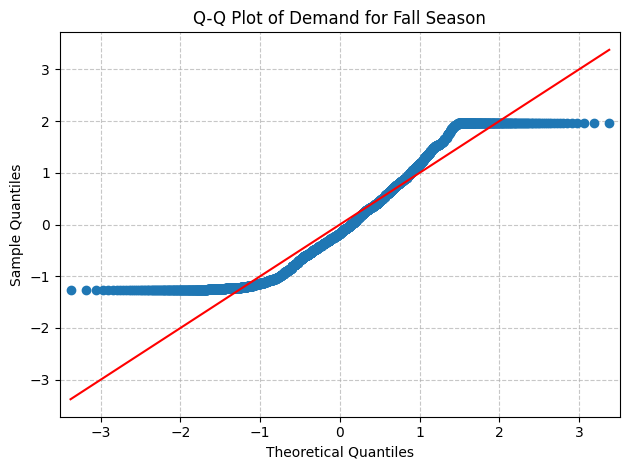


Generating Q-Q Plot for Season: Spring
Number of observations: 2686


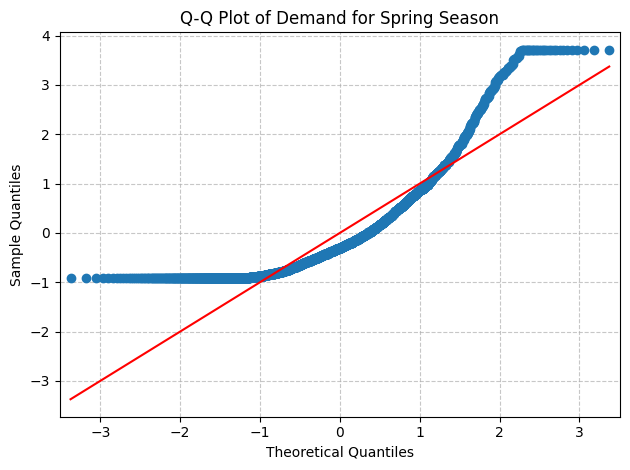


Generating Q-Q Plot for Season: Summer
Number of observations: 2733


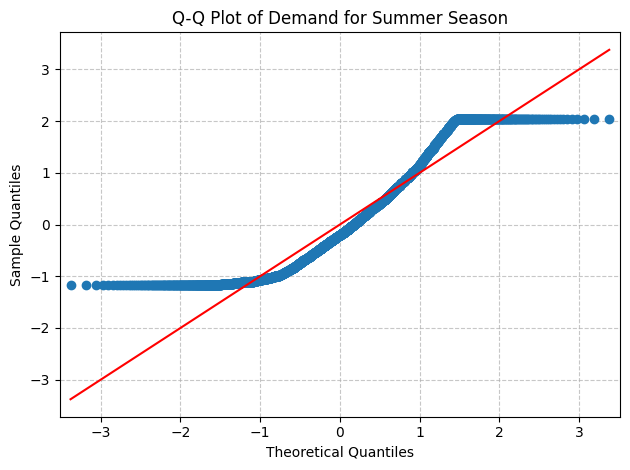


Generating Q-Q Plot for Season: Winter
Number of observations: 2734


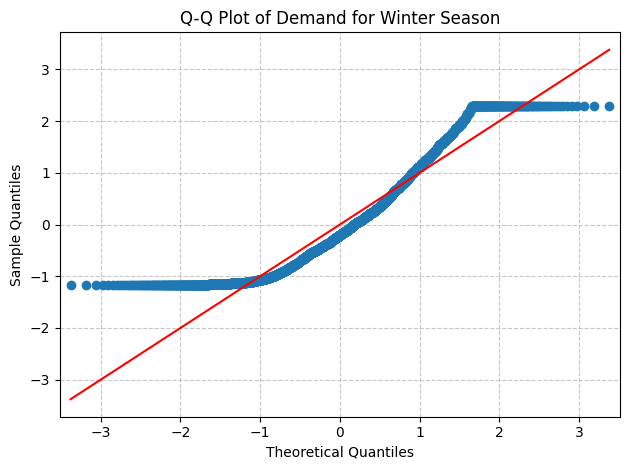

In [ ]:
# Define the column names for demand and season
demand_col = 'count'
season_col = 'season'

# Map season codes to descriptive labels
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
df['season_desc'] = df[season_col].map(season_labels)

print("--- Generating Q-Q Plots for Demand by Season ---")

# Group data by descriptive season and select the demand column
season_groups = df.groupby('season_desc')[demand_col]

# Iterate through each season group to create a Q-Q plot
for name, group in season_groups:
    print(f"\nGenerating Q-Q Plot for Season: {name}")
    print(f"Number of observations: {len(group)}")

    # Check if there are enough data points for a Q-Q plot (at least 2)
    if len(group) >= 2:
        # Create the Q-Q plot
        # line='s' plots a standardized line (mean=0, std=1)
        # fit=True fits a line to the data points
        fig = sm.qqplot(group, line='s', fit=True)
        plt.title(f'Q-Q Plot of Demand for {name} Season')
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel('Sample Quantiles')
        plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for better readability
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show() # Display the plot
        plt.close(fig) # Close the figure to free up memory
    else:
        print(f"Q-Q Plot skipped: Not enough data points ({len(group)}) for '{name}' group (requires at least 2).")
        if len(group) == 1:
            print(f"Single data point value: {group.iloc[0]}")


Summary of the Q-Q Plots:

Upon reviewing the generated Q-Q plots for each season:

Spring Season: The points deviate significantly from the straight line, especially at the lower and upper tails. This indicates that the demand distribution for Spring is not normal and has heavier tails than a normal distribution.

Summer Season: Similar to Spring, the points show a clear departure from the straight line, particularly at the higher quantiles. This suggests that the demand distribution for Summer is also not normal and is right-skewed.

Fall Season: The deviation from the straight line is evident, especially at the upper end. This indicates that the demand distribution for Fall is not normal and is right-skewed.

Winter Season: The points consistently deviate from the straight line, particularly at the higher quantiles, indicating that the demand distribution for Winter is also not normal and is right-skewed.

# CHECKING FOR SKEWNESS AND KURTOSIS:

In [ ]:
# Define the column names for demand and season
demand_col = 'count'
season_col = 'season'

# Map season codes to descriptive labels
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
df['season_desc'] = df[season_col].map(season_labels)

# Group data by descriptive season and select the demand column
season_groups = df.groupby('season_desc')[demand_col]

print("--- Calculating Skewness and Kurtosis for Demand by Season ---")

# Iterate through each season group to calculate and print skewness and kurtosis
for name, group in season_groups:
    print(f"\n--- Demand ('{demand_col}') for Season: {name} ---")
    print(f"Number of observations: {len(group)}")

    # Calculate Skewness
    # Skewness measures the asymmetry of the distribution.
    # Positive skewness: tail on the right is longer.
    # Negative skewness: tail on the left is longer.
    # Skewness near 0: symmetrical distribution.
    skewness = group.skew()

    # Calculate Kurtosis
    # Kurtosis measures the 'tailedness' and 'peakedness' of the distribution.
    # Positive kurtosis (leptokurtic): heavier tails and more pronounced peak than normal.
    # Negative kurtosis (platykurtic): lighter tails and flatter peak than normal.
    # Kurtosis near 0 (mesokurtic): similar tailedness to a normal distribution.
    kurtosis = group.kurt()

    print(f"Skewness: {skewness:.4f}")
    print(f"Kurtosis: {kurtosis:.4f}")

    # Note about interpretation:
    # For a perfectly normal distribution, skewness is 0 and kurtosis is 0 (excess kurtosis).
    # Pandas/SciPy calculate excess kurtosis by default (kurtosis - 3).
    # So, a positive value means more peaked/heavier tails than normal, negative means flatter/lighter tails.

--- Calculating Skewness and Kurtosis for Demand by Season ---

--- Demand ('count') for Season: Fall ---
Number of observations: 2733
Skewness: 0.4954
Kurtosis: -0.8544

--- Demand ('count') for Season: Spring ---
Number of observations: 2686
Skewness: 1.6642
Kurtosis: 2.7678

--- Demand ('count') for Season: Summer ---
Number of observations: 2733
Skewness: 0.6618
Kurtosis: -0.6658

--- Demand ('count') for Season: Winter ---
Number of observations: 2734
Skewness: 0.7590
Kurtosis: -0.3733


**Key Observations:**
🍂 Fall
- Skewness: 0.4954 → Mild right skew; demand is slightly more concentrated on the lower end with occasional higher rental spikes.
- Kurtosis: -0.8544 → Platykurtic distribution; fewer extreme values and a flatter peak.
- Conclusion: Demand in fall is relatively balanced, showing consistent usage without dramatic highs or lows.

🌱 Spring
- Skewness: 1.6642 → Strong right skew; many low-demand days but a long tail of high-demand outliers.
- Kurtosis: 2.7678 → Leptokurtic; a sharply peaked distribution with more extreme values.
- Conclusion: Spring sees uneven demand with pronounced spikes — possibly due to fluctuating weather or events like festivals and holidays.

☀️ Summer
- Skewness: 0.6618 → Moderate right skew; demand is higher than in fall but still shows asymmetry.
- Kurtosis: -0.6658 → Slightly flatter distribution; less concentrated around the mean.
- Conclusion: Summer attracts steady demand with a few peak days, likely driven by warm weather encouraging casual ridership.

❄️ Winter
- Skewness: 0.7590 → Moderate skew; more low-demand days than high, consistent with colder conditions.
- Kurtosis: -0.3733 → Slightly flat-tailed distribution, fewer extremes.
- Conclusion: Winter demand dips, but not drastically — commuters might still maintain steady usage, while casual users back off.

**Overall Insights:**
- Spring has the most volatile demand (high skewness and kurtosis).
- Fall is the most stable season for rentals, with flatter and more symmetric demand.
- These patterns hint at user behavior shifts — casual users surging in warmer months, and regulars keeping winter afloat.



# Shapiro-Wilk Test:

In [ ]:
# Define the column names for demand and season
demand_col = 'count'
season_col = 'season'

# Map season codes to descriptive labels
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
df['season_desc'] = df[season_col].map(season_labels)

# Group data by descriptive season and select the demand column
season_groups = df.groupby('season_desc')[demand_col]

print("--- Performing Shapiro-Wilk Test for Normality of Demand by Season ---")

# Iterate through each season group to perform the Shapiro-Wilk test
for name, group in season_groups:
    print(f"\n--- Demand ('{demand_col}') for Season: {name} ---")
    print(f"Number of observations: {len(group)}")

    # Shapiro-Wilk test requires at least 3 samples.
    if len(group) >= 3:
        shapiro_stat, shapiro_p = stats.shapiro(group)
        print(f"Shapiro-Wilk Test Statistic: {shapiro_stat:.4f}")
        print(f"Shapiro-Wilk Test p-value: {shapiro_p:.4f}")

        # Interpret the p-value
        alpha = 0.05 # Significance level
        if shapiro_p <= alpha:
            print(f"Conclusion: p-value ({shapiro_p:.4f}) <= alpha ({alpha}), so we reject the Null Hypothesis of Normality.")
        else:
            print(f"Conclusion: p-value ({shapiro_p:.4f}) > alpha ({alpha}), so we fail to reject the Null Hypothesis of Normality.")
    else:
        print(f"Shapiro-Wilk Test skipped: Not enough data points ({len(group)}) for '{name}' group (requires at least 3).")
        if len(group) == 1:
            print(f"Single data point value: {group.iloc[0]}")

--- Performing Shapiro-Wilk Test for Normality of Demand by Season ---

--- Demand ('count') for Season: Fall ---
Number of observations: 2733
Shapiro-Wilk Test Statistic: 0.9241
Shapiro-Wilk Test p-value: 0.0000
Conclusion: p-value (0.0000) <= alpha (0.05), so we reject the Null Hypothesis of Normality.

--- Demand ('count') for Season: Spring ---
Number of observations: 2686
Shapiro-Wilk Test Statistic: 0.8186
Shapiro-Wilk Test p-value: 0.0000
Conclusion: p-value (0.0000) <= alpha (0.05), so we reject the Null Hypothesis of Normality.

--- Demand ('count') for Season: Summer ---
Number of observations: 2733
Shapiro-Wilk Test Statistic: 0.9038
Shapiro-Wilk Test p-value: 0.0000
Conclusion: p-value (0.0000) <= alpha (0.05), so we reject the Null Hypothesis of Normality.

--- Demand ('count') for Season: Winter ---
Number of observations: 2734
Shapiro-Wilk Test Statistic: 0.9092
Shapiro-Wilk Test p-value: 0.0000
Conclusion: p-value (0.0000) <= alpha (0.05), so we reject the Null Hypothes

Interpretation of Shapiro-Wilk Test Results: The Shapiro-Wilk test formally assesses the null hypothesis that the data is drawn from a normal distribution.

For all seasons (Fall, Spring, Summer, Winter):

The p-value is 0.0000 (or very close to zero).

This p-value is less than or equal to our chosen significance level (alpha) of 0.05.

**Conclusion:**

For every season, we reject the Null Hypothesis of Normality. This means that there is statistically significant evidence to conclude that the distribution of bicycle demand for each individual season is not normally distributed.

This finding is consistent with the visual inspections from the Q-Q plots and the quantitative measures of skewness and kurtosis, all of which pointed to non-normal distributions for bicycle demand across the seasons. This re-confirms that the normality assumption for a standard One-Way ANOVA is violated in this dataset.

# Levene's Test:

In [ ]:
# Define the column names for demand and season
demand_col = 'count'
season_col = 'season'

# Map season codes to descriptive labels
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
df['season_desc'] = df[season_col].map(season_labels)

# Group data by descriptive season and select the demand column
season_groups = df.groupby('season_desc')[demand_col]

# Prepare data for Levene's test
# Levene's test requires more than one group, and each group must have more than one sample.
data_for_levene = []
group_names_for_levene = []

for name, group in season_groups:
    # All season groups in this dataset have many observations, so this check is mostly for robustness.
    if len(group) > 1:
        data_for_levene.append(group)
        group_names_for_levene.append(name)
    else:
        print(f"Skipping group '{name}' for Levene's test: Not enough data points ({len(group)}) (requires at least 2).")

print("\n--- Performing Levene’s Test for Equality of Variances across Seasons ---")

if len(data_for_levene) > 1:
    # Perform Levene's test. 'center='median'' is recommended for non-normal data.
    levene_stat, levene_p = stats.levene(*data_for_levene, center='median')
    print(f"Levene's Test Statistic: {levene_stat:.4f}")
    print(f"Levene's Test p-value: {levene_p:.4f}")

    # Interpret the p-value
    alpha = 0.05 # Significance level
    if levene_p <= alpha:
        print(f"Conclusion: p-value ({levene_p:.4f}) <= alpha ({alpha}), so we reject the Null Hypothesis of Equal Variances.")
    else:
        print(f"Conclusion: p-value ({levene_p:.4f}) > alpha ({alpha}), so we fail to reject the Null Hypothesis of Equal Variances.")
else:
    print("Levene's Test skipped: Not enough valid groups (groups with >1 data point) to perform the test.")


--- Performing Levene’s Test for Equality of Variances across Seasons ---
Levene's Test Statistic: 209.5681
Levene's Test p-value: 0.0000
Conclusion: p-value (0.0000) <= alpha (0.05), so we reject the Null Hypothesis of Equal Variances.


Conclusion:

Since the p-value (0.0000) is much smaller than our chosen significance level alpha (0.05), we reject the Null Hypothesis of Equal Variances.

This means that there is statistically significant evidence to conclude that the variances of bicycle demand are not equal across the different seasons. In other words, the spread or variability of bicycle rental numbers differs significantly from one season to another.

This finding confirms the violation of the homogeneity of variances assumption, which is a key assumption for a standard One-Way ANOVA. As noted previously, this suggests that while a standard ANOVA was performed, its results should be interpreted with caution, and alternatives like Welch's ANOVA or non-parametric tests would be more appropriate for robust conclusions regarding mean differences.

# ***Question: Check if the Weather conditions are significantly different during different Seasons?***

Null Hypothesis (H_0): Weather conditions are independent of the season. (There is no significant association between weather conditions and seasons.)

Alternate Hypothesis (H_1): Weather conditions are dependent on the season. (There is a significant association between weather conditions and seasons.)

The Chi-square ( chi 2 ) test for independence was selected as the appropriate test because both 'Weather' and 'Season' are categorical variables, and we are examining if there is a statistical association between them.

Created a Contingency Table against ‘Weather’ & ‘Season’ columns below:

To make the table more readable, I first mapped the numerical codes for 'weather' and 'season' to descriptive labels.

In [ ]:
# Define the columns for weather and season
weather_col = 'weather'
season_col = 'season'

# Map numerical codes to descriptive labels for better readability in the contingency table
weather_labels = {
    1: "Clear / Partly Cloudy",
    2: "Mist / Cloudy",
    3: "Light Snow / Light Rain",
    4: "Heavy Rain / Snow / Fog"
}
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

df['weather_desc'] = df[weather_col].map(weather_labels)
df['season_desc'] = df[season_col].map(season_labels)

# Create a Contingency Table against ‘Weather’ & ‘Season’ columns
print("\n--- Contingency Table (Observed Frequencies) ---")
contingency_table = pd.crosstab(df['season_desc'], df['weather_desc'])
print(contingency_table)

#Set a significance level and Calculate the test Statistics / p-value.
alpha = 0.05
print(f"\n--- Performing Chi-square Test (alpha = {alpha}) ---")

# Perform the Chi-square test for independence
# chi2_contingency returns: chi2, p, dof, expected
chi2_stat, p_value, dof, expected_frequencies = stats.chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

print("\n--- Expected Frequencies Table ---")
expected_df = pd.DataFrame(expected_frequencies, index=contingency_table.index, columns=contingency_table.columns)
print(expected_df.round(2)) # Round for cleaner display

# Check for expected frequencies assumption (usually > 5 for most cells)
low_expected_count_cells = (expected_frequencies < 5).sum().sum()
total_cells = expected_frequencies.size
print(f"\nNumber of cells with expected frequency < 5: {low_expected_count_cells} out of {total_cells} total cells.")
if low_expected_count_cells > 0:
    print("Warning: Some cells have expected frequencies less than 5. The Chi-square approximation might be less reliable.")
    # Specifically check the 'Heavy Rain / Snow / Fog' column as it has only 1 observation in raw data
    if 'Heavy Rain / Snow / Fog' in expected_df.columns:
        print(f"Expected counts for 'Heavy Rain / Snow / Fog' column:\n{expected_df['Heavy Rain / Snow / Fog'].round(2)}")

# Decide whether to accept or reject the Null Hypothesis.
print("\n--- Decision ---")
if p_value <= alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than or equal to the significance level alpha ({alpha}), we reject the Null Hypothesis.")
    print("This suggests that there is a statistically significant association between weather conditions and seasons.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than the significance level alpha ({alpha}),\n we do not have sufficient evidence to reject the Null Hypothesis.")
    print("This suggests that there is no statistically significant association between weather conditions and seasons.")


--- Contingency Table (Observed Frequencies) ---
weather_desc  Clear / Partly Cloudy  Heavy Rain / Snow / Fog  \
season_desc                                                    
Fall                           1930                        0   
Spring                         1759                        1   
Summer                         1801                        0   
Winter                         1702                        0   

weather_desc  Light Snow / Light Rain  Mist / Cloudy  
season_desc                                           
Fall                              199            604  
Spring                            211            715  
Summer                            224            708  
Winter                            225            807  

--- Performing Chi-square Test (alpha = 0.05) ---
Chi-square Statistic: 49.1587
P-value: 0.0000
Degrees of Freedom: 9

--- Expected Frequencies Table ---
weather_desc  Clear / Partly Cloudy  Heavy Rain / Snow / Fog  \
season_desc     

**Inferences & Conclusions:**

Significant Association: By rejecting the null hypothesis, we conclude that there is a statistically significant association between weather conditions and seasons. This means that the distribution of different weather conditions is not the same across all seasons; certain weather conditions are more prevalent or less prevalent in specific seasons.

Expected Frequencies Warning: It's important to note the warning about expected frequencies. The 'Heavy Rain / Snow / Fog' category has very low expected counts (all are 0.25), which technically violates the assumption that most expected cell counts should be 5 or greater for the Chi-square approximation to be reliable. However, given the very large overall sample size and the extremely low p-value, the conclusion of a significant association is still likely robust. The presence of this specific weather condition is extremely rare, making its expected frequency low regardless of season.

**Recommendations:**

Season-Specific Weather Planning: The strong association between weather and season implies that operational planning for bicycle rentals should inherently account for seasonal weather patterns. For example, preparing for more "Clear / Partly Cloudy" days in Summer/Fall and more "Mist / Cloudy" or "Light Snow / Light Rain" days in Spring/Winter.

Targeted Marketing/Operations: Marketing campaigns could be tailored to specific seasons, highlighting the joy of cycling in ideal weather during peak seasons, or promoting alternative activities/services during less favorable weather. Operations might need to adjust staffing and bike availability based on expected weather.

Further Granular Analysis (if needed): While the Chi-square test tells us there's an association, it doesn't tell us which specific season-weather combinations contribute most to this association. If more detailed insights are needed, analyzing the standardized residuals from the Chi-square test could reveal which cells have observed counts significantly different from their expected counts. However, for practical purposes, the contingency table itself already gives a good indication of the distribution.

Data Quality Check for Rare Categories: The 'Heavy Rain / Snow / Fog' category being extremely rare (only 1 occurrence in the entire dataset) suggests it might be an outlier or a category that could be merged with another if it doesn't provide meaningful distinct information for practical decision-making.

# Interpretation of the specific patterns in the Heatmap - which season-weather combinations occur most frequently:

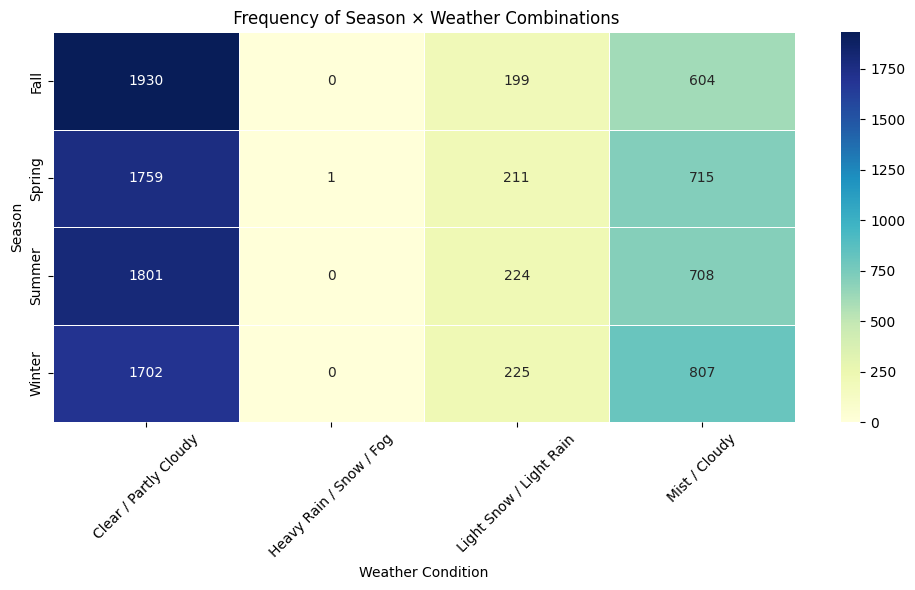

In [ ]:
# Define mappings for season and weather
season_labels = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

weather_labels = {
    1: "Clear / Partly Cloudy",
    2: "Mist / Cloudy",
    3: "Light Snow / Light Rain",
    4: "Heavy Rain / Snow / Fog"
}

# Map numerical values to descriptive labels
df['season_desc'] = df['season'].map(season_labels)
df['weather_desc'] = df['weather'].map(weather_labels)

# Create contingency table (frequency count)
heatmap_data = pd.crosstab(df['season_desc'], df['weather_desc'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)

plt.title(" Frequency of Season × Weather Combinations")
plt.ylabel("Season")
plt.xlabel("Weather Condition")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key Observations:**

**Overall Dominant Weather Condition:**

"Clear / Partly Cloudy" is by far the most frequent weather condition across all seasons. The counts for this category (1930 in Fall, 1759 in Spring, 1801 in Summer, 1702 in Winter) are significantly higher than any other weather condition, indicating that most observations fall under generally good weather.

**Rarity of Severe Weather:**

"Heavy Rain / Snow / Fog" is extremely rare or non-existent in the observed data.

There is 0 occurrence in Fall, Summer, and Winter.

Only 1 occurrence is noted in Spring.

This suggests that the dataset primarily consists of days with less severe weather, or that such extreme conditions were very infrequent during the data collection period.

**Prevalence of Moderate Weather:**

"Light Snow / Light Rain" occurs moderately across seasons.

It's present in Fall (199), Spring (211), Summer (224), and Winter (225).

The counts are relatively consistent across seasons, hovering around 200-225 observations. This indicates that light precipitation is a regular, but not dominant, occurrence throughout the year.

"Mist / Cloudy" is also quite common, especially in Winter.

It shows a notable presence in Fall (604), Spring (715), Summer (708), and Winter (807).

Winter has the highest frequency of "Mist / Cloudy" conditions (807), suggesting that cloudy or misty days are more characteristic of the winter season compared to others.

**Seasonal Variations:**

Fall: Primarily clear/partly cloudy, with a good number of misty/cloudy days and some light rain/snow. No heavy weather.

Spring: Similar to Fall, dominated by clear/partly cloudy. Has the only instance of "Heavy Rain / Snow / Fog" (just 1 observation). Also sees a fair share of light rain/snow and mist/cloudy.

Summer: Very similar to Fall and Spring, with clear/partly cloudy being dominant. A considerable number of misty/cloudy days and some light rain/snow. No heavy weather.

Winter: While still dominated by clear/partly cloudy, Winter has the highest proportion of "Mist / Cloudy" days compared to other seasons. It also has a consistent presence of light snow/light rain. No heavy weather.

**Summary:**

The dataset primarily captures periods of relatively good weather ("Clear / Partly Cloudy"). Severe weather ("Heavy Rain / Snow / Fog") is almost entirely absent. Moderate conditions like "Light Snow / Light Rain" and "Mist / Cloudy" are regular occurrences, with "Mist / Cloudy" being particularly prevalent in Winter. This distribution suggests that the data might represent typical daily conditions rather than focusing on extreme weather events.

# **FINAL RECOMMENDATIONS:**

**Demand Drivers & Distributions:**
- Temperature positively influences rentals, especially among casual users. Warmer days invite higher usage.
- Humidity discourages casual riders, though the effect is subtler than temperature.
- Windspeed shows weak or non-linear effects — worth deeper modeling if needed.
- Skewed distributions across count, windspeed, and casual usage suggest frequent low-activity days with occasional spikes.

**Time-Based Patterns:**
- Consistent ridership across weekdays and weekends indicates multipurpose use (commuting + leisure).
- Seasonal variance confirmed — Spring is volatile, Fall is stable.
- Weather and season are significantly associated — rental behavior shifts predictably with seasonal weather patterns.

**Holiday & Working Day Influence:**
- Few holiday records → Limited direct comparison but ripe for contrast studies.
- Working days dominate → Reflects commuting-driven demand, especially among registered users.


**Operational Planning:**
- Maintain uniform resource allocation across days and seasons.
- Schedule maintenance during low-traffic windows rather than fixed days.
- Prepare for seasonal weather shifts — bikes, staffing, and support should adapt.

**Marketing & Engagement:**
- Run all-week campaigns instead of weekend targeting.
- Build behavioral-based segments, like frequent commuters vs leisure riders.
- Launch loyalty programs rewarding consistency across varying conditions.
Marketing & User Engagement

**Fleet Management Recommendations for Seasonal Weather Variations:**

🍂 Fall (Stable Demand)
- Inventory Strategy: Keep a steady fleet size. Fall shows consistent usage with fewer demand spikes.
- Maintenance Planning: Ideal time for scheduled servicing and battery replacements due to predictable usage.
- Engagement Campaigns: Highlight pleasant riding conditions to attract casual users, without needing aggressive promos.

🌱 Spring (Volatile Demand)
- Inventory Strategy: Maintain scalable fleet reserves — unexpected demand spikes can strain availability.
- Weather Monitoring: Use real-time weather tracking to anticipate dips (light rain) or surges (clear spells).
- Campaign Focus: Boost promotions around short-term weather breaks — “Make the most of a sunny spring day”–type messaging.

☀️ Summer (High & Predictable Demand)
- Fleet Deployment: Maximize fleet capacity, especially in high-density zones.
- Cooling Measures: Consider heat-mitigation features like reflective covers or shaded parking hubs.
- Commuter & Leisure Focus: Target both weekday riders and weekend explorers with tailored incentives.

❄️ Winter (Lower but Consistent Demand)
- Fleet Optimization: Slightly reduce fleet size in areas with low activity but maintain coverage for commuters.
- Battery Performance Check: Cold weather affects battery life — increase frequency of battery checks or swap cycles.
- Operational Messaging: Position Yulu as a reliable choice for short city commutes — even in brisk weather.

**General Strategies Across All Seasons:**

🔄 Dynamic Redistribution:

Use predictive demand models to rebalance bikes hourly or daily, shifting inventory from underutilized to high-demand zones based on weather forecasts.

🛠️ Maintenance Based on Usage, Not Calendar:

Instead of servicing bikes strictly by date, analyze ride frequency and environmental exposure to optimize maintenance schedules.

📈 Weather-Aware Forecasting:

Combine weather, season, and event data to forecast demand. Use machine learning models trained on past seasonal trends to guide fleet size and location.

🧪 A/B Testing of Interventions:

Try seasonal interventions like rain-ride discounts or weekend bundles, and use rider data to validate their effectiveness.


